# EDA for modeling the machine learning
## Target feature: Rating

In [1]:
# Libraries needed to the EDA

import numpy as np
import pandas as pd
import pandas_profiling
import seaborn as sns
import matplotlib.pyplot as plt
from time import time

#Allow the usage of display() for DataFrames
from IPython.display import display # Permite a utilização da função display() para DataFrames.

#Show matplot graphs on the notebook
%matplotlib inline


In [50]:
# Loading the dataset obtained

df = pd.read_csv("../data_root/raw/wine_dataset.csv", sep=",", index_col=0)
df.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Fragrances suggest hay, crushed tomato vine an...",Kirchleiten,90,30.0,Northeastern Italy,Alto Adige,NaN,Kerin O’Keefe,@kerinokeefe,Tiefenbrunner 2012 Kirchleiten Sauvignon (Alto...,Sauvignon,Tiefenbrunner
1,France,"Packed with fruit and crisp acidity, this is a...",NaN,87,22.0,Loire Valley,Sancerre,NaN,Roger Voss,@vossroger,Bernard Reverdy et Fils 2014 Rosé (Sancerre),Rosé,Bernard Reverdy et Fils
2,Italy,"This easy, ruby-red wine displays fresh berry ...",NaN,86,NaN,Tuscany,Chianti Classico,NaN,NaN,NaN,Dievole 2009 Chianti Classico,Sangiovese,Dievole
3,US,Pretty in violet and rose petals this is a low...,Horseshoe Bend Vineyard,92,50.0,California,Russian River Valley,Sonoma,Virginie Boone,@vboone,Davis Family 2012 Horseshoe Bend Vineyard Pino...,Pinot Noir,Davis Family
4,US,This golden wine confounds in a mix of wet sto...,Dutton Ranch,93,38.0,California,Russian River Valley,Sonoma,Virginie Boone,@vboone,Dutton-Goldfield 2013 Dutton Ranch Chardonnay ...,Chardonnay,Dutton-Goldfield


In [3]:
# Create a Profiling Report
df.profile_report(style={'full_width':True})

In [4]:
# Define the quantiles to be the rating standards
limits_quantiles = [0.10, 0.30, 0.70, 0.90]

min_point = df['points'].min()
rating_one = df['points'].quantile(limits_quantiles[0])
print('For 1 star the points are between:  [{},{}]'.format(min_point, rating_one))
rating_two = df['points'].quantile(limits_quantiles[1])
print('For 2 stars the points are between: ({},{}]'.format(rating_one, rating_two))
rating_three = df['points'].quantile(limits_quantiles[2])
print('For 3 stars the points are between: ({},{}]'.format(rating_two, rating_three))
rating_four = df['points'].quantile(limits_quantiles[3])
print('For 4 stars the points are between: ({},{}]'.format(rating_three, rating_four))
max_point = df['points'].max()
print('For 5 stars the points are between: ({},{}]'.format(rating_four, max_point))

# Define a function to be applied to the dataframe and create a new feature that will
# be the label and so the target for the algorithm

def rating_the_points(points):
    if points <= rating_one: 
        return 1
    if points <= rating_two: 
        return 2
    if points <= rating_three: 
        return 3
    if points <= rating_four: 
        return 4
    if points <= max_point: 
        return 5
    else: 
        raise ValueError('Input value out of range')

For 1 star the points are between:  [80,85.0]
For 2 stars the points are between: (85.0,87.0]
For 3 stars the points are between: (87.0,90.0]
For 4 stars the points are between: (90.0,92.0]
For 5 stars the points are between: (92.0,100]


In [5]:
# Apply the function rating_the_points to the dataframe df
df['wine_rating'] = df['points'].apply(lambda x: rating_the_points(x))
df.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,wine_rating
0,Italy,"Fragrances suggest hay, crushed tomato vine an...",Kirchleiten,90,30.0,Northeastern Italy,Alto Adige,NaN,Kerin O’Keefe,@kerinokeefe,Tiefenbrunner 2012 Kirchleiten Sauvignon (Alto...,Sauvignon,Tiefenbrunner,3
1,France,"Packed with fruit and crisp acidity, this is a...",NaN,87,22.0,Loire Valley,Sancerre,NaN,Roger Voss,@vossroger,Bernard Reverdy et Fils 2014 Rosé (Sancerre),Rosé,Bernard Reverdy et Fils,2
2,Italy,"This easy, ruby-red wine displays fresh berry ...",NaN,86,NaN,Tuscany,Chianti Classico,NaN,NaN,NaN,Dievole 2009 Chianti Classico,Sangiovese,Dievole,2
3,US,Pretty in violet and rose petals this is a low...,Horseshoe Bend Vineyard,92,50.0,California,Russian River Valley,Sonoma,Virginie Boone,@vboone,Davis Family 2012 Horseshoe Bend Vineyard Pino...,Pinot Noir,Davis Family,4
4,US,This golden wine confounds in a mix of wet sto...,Dutton Ranch,93,38.0,California,Russian River Valley,Sonoma,Virginie Boone,@vboone,Dutton-Goldfield 2013 Dutton Ranch Chardonnay ...,Chardonnay,Dutton-Goldfield,5


## Bivariated Analysis :
### Rating x Price


(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

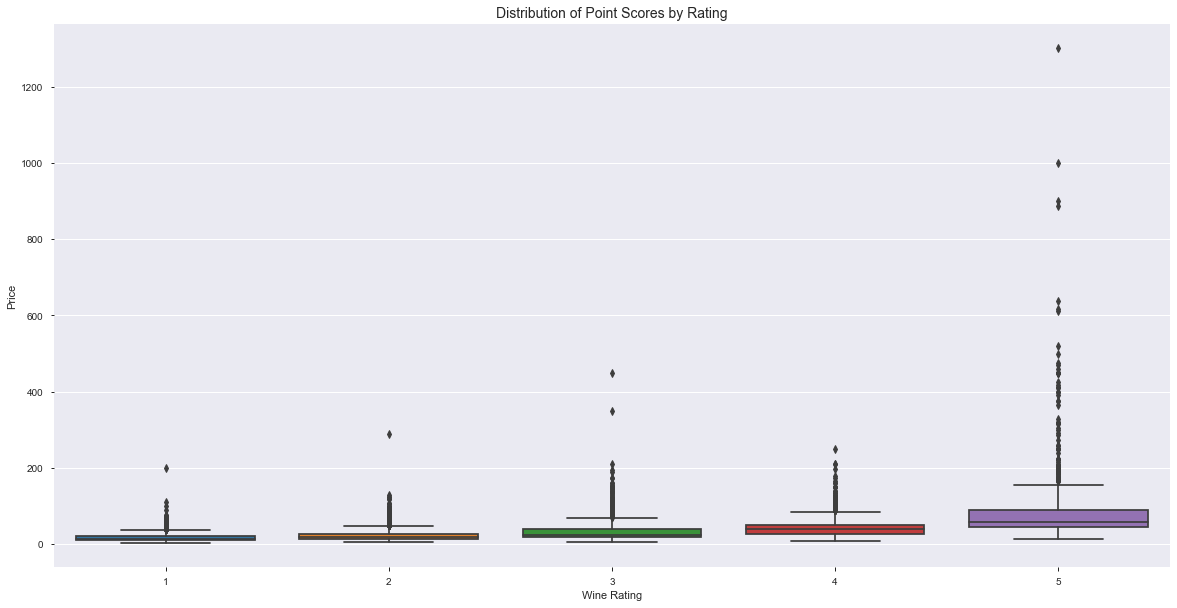

In [6]:
fig, ax = plt.subplots(figsize = (20,10))
chart = sns.boxplot(x='wine_rating',y='price', data=df, ax = ax)
plt.title('Distribution of Point Scores by Rating',size=14) 
plt.xlabel('Wine Rating') 
plt.ylabel('Price')
plt.xticks()

### Rating x Principal Variety 

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

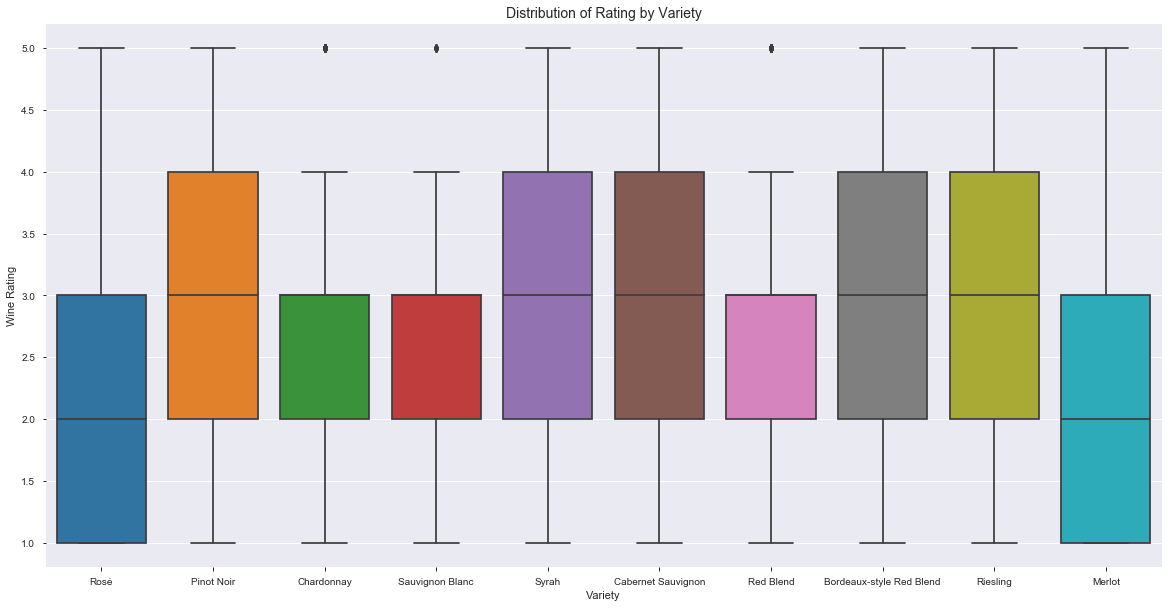

In [7]:
# Segment the principal variety obtained from the DF profiling
principal_variety = ["Pinot Noir", "Chardonnay", "Cabernet Sauvignon", "Red Blend", "Bordeaux-style Red Blend", "Riesling", "Sauvignon Blanc", "Syrah", "Rosé", "Merlot"]

# Create a selection on DF to explore the relation between Variety and Rating
df_for_principal_variety = df.loc[df.variety.isin(principal_variety)]

# Plot the graph
fig, ax = plt.subplots(figsize = (20,10))
chart = sns.boxplot(x='variety',y='wine_rating', data=df_for_principal_variety, ax = ax)
plt.title('Distribution of Rating by Variety',size=14) 
plt.xlabel('Variety') 
plt.ylabel('Wine Rating')
plt.xticks()

### Taster x Rating

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text xticklabel objects>)

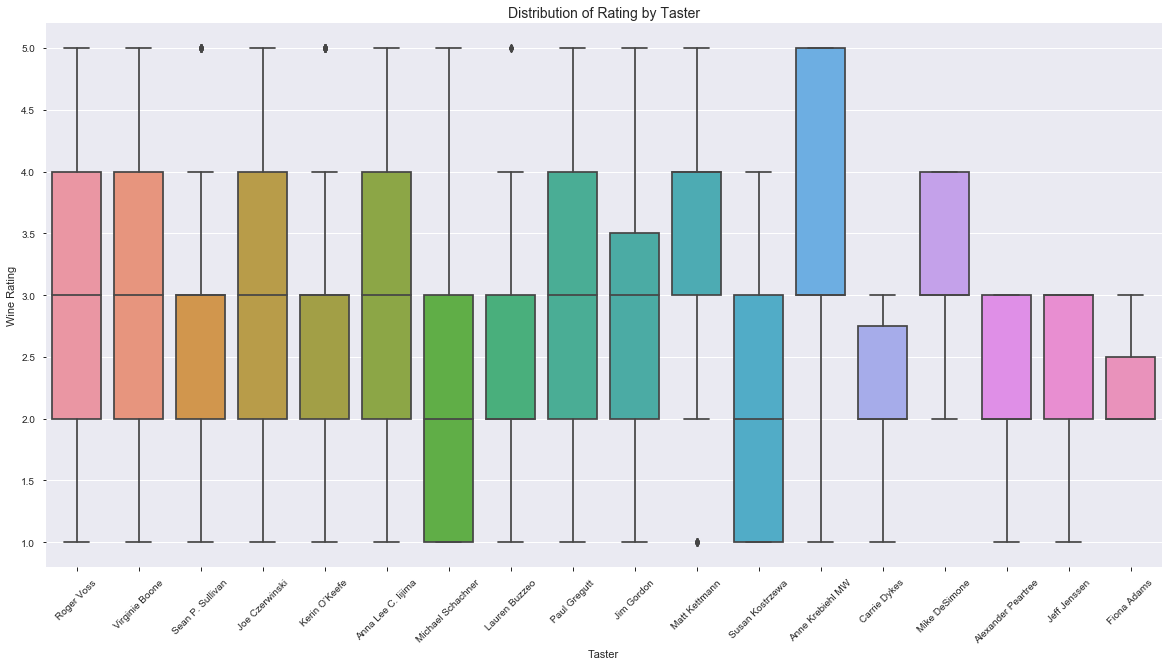

In [8]:
# Plot the graph
fig, ax = plt.subplots(figsize = (20,10))
chart = sns.boxplot(x='taster_name',y='wine_rating', data=df_for_principal_variety, ax = ax)
plt.title('Distribution of Rating by Taster',size=14) 
plt.xlabel('Taster') 
plt.ylabel('Wine Rating')
plt.xticks(rotation = 45)

### Country x Rating

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text xticklabel objects>)

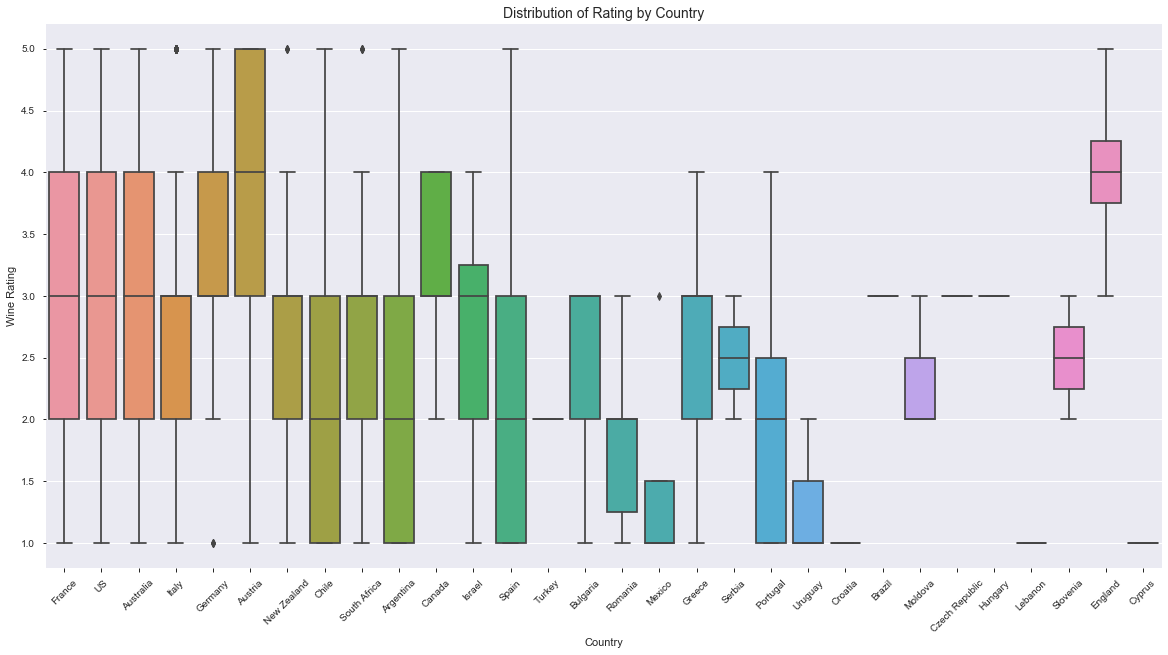

In [9]:
# Plot the graph
fig, ax = plt.subplots(figsize = (20,10))
chart = sns.boxplot(x='country',y='wine_rating', data=df_for_principal_variety, ax = ax)
plt.title('Distribution of Rating by Country',size=14) 
plt.xlabel('Country') 
plt.ylabel('Wine Rating')
plt.xticks(rotation = 45)

### Rating Histogram

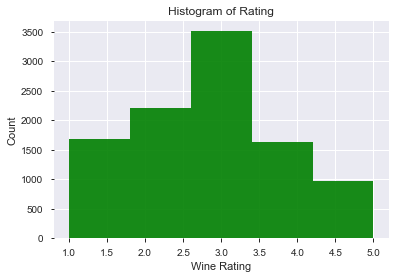

In [10]:
# the histogram of rating
n, bins, patches = plt.hist(df.wine_rating, bins=5, facecolor='g', alpha=0.9)

plt.xlabel('Wine Rating')
plt.ylabel('Count')
plt.title('Histogram of Rating')
plt.grid(True)

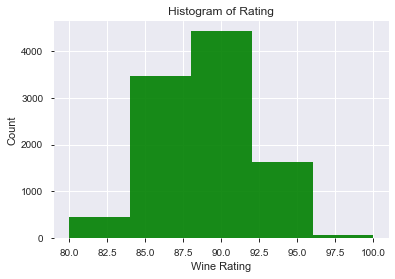

In [56]:
# the histogram of points
n, bins, patches = plt.hist(df.points, bins=5, facecolor='g', alpha=0.9)

plt.xlabel('Wine Rating')
plt.ylabel('Count')
plt.title('Histogram of Rating')
plt.grid(True)

# Feature Engineering

In [11]:
df.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,wine_rating
0,Italy,"Fragrances suggest hay, crushed tomato vine an...",Kirchleiten,90,30.0,Northeastern Italy,Alto Adige,NaN,Kerin O’Keefe,@kerinokeefe,Tiefenbrunner 2012 Kirchleiten Sauvignon (Alto...,Sauvignon,Tiefenbrunner,3
1,France,"Packed with fruit and crisp acidity, this is a...",NaN,87,22.0,Loire Valley,Sancerre,NaN,Roger Voss,@vossroger,Bernard Reverdy et Fils 2014 Rosé (Sancerre),Rosé,Bernard Reverdy et Fils,2
2,Italy,"This easy, ruby-red wine displays fresh berry ...",NaN,86,NaN,Tuscany,Chianti Classico,NaN,NaN,NaN,Dievole 2009 Chianti Classico,Sangiovese,Dievole,2
3,US,Pretty in violet and rose petals this is a low...,Horseshoe Bend Vineyard,92,50.0,California,Russian River Valley,Sonoma,Virginie Boone,@vboone,Davis Family 2012 Horseshoe Bend Vineyard Pino...,Pinot Noir,Davis Family,4
4,US,This golden wine confounds in a mix of wet sto...,Dutton Ranch,93,38.0,California,Russian River Valley,Sonoma,Virginie Boone,@vboone,Dutton-Goldfield 2013 Dutton Ranch Chardonnay ...,Chardonnay,Dutton-Goldfield,5


In [12]:
# Drop categorical features that has a high percentage of NaN

df = df.drop(['designation', 'region_1', 'region_2', 'taster_twitter_handle', 'winery'], axis = 1)

In [13]:
df.head()

,country,description,points,price,province,taster_name,title,variety,wine_rating
0,Italy,"Fragrances suggest hay, crushed tomato vine an...",90,30.0,Northeastern Italy,Kerin O’Keefe,Tiefenbrunner 2012 Kirchleiten Sauvignon (Alto...,Sauvignon,3
1,France,"Packed with fruit and crisp acidity, this is a...",87,22.0,Loire Valley,Roger Voss,Bernard Reverdy et Fils 2014 Rosé (Sancerre),Rosé,2
2,Italy,"This easy, ruby-red wine displays fresh berry ...",86,NaN,Tuscany,NaN,Dievole 2009 Chianti Classico,Sangiovese,2
3,US,Pretty in violet and rose petals this is a low...,92,50.0,California,Virginie Boone,Davis Family 2012 Horseshoe Bend Vineyard Pino...,Pinot Noir,4
4,US,This golden wine confounds in a mix of wet sto...,93,38.0,California,Virginie Boone,Dutton-Goldfield 2013 Dutton Ranch Chardonnay ...,Chardonnay,5


In [14]:
# Renaming the columns to avoid any problems with BoW
# the df from now is the base for the machine learnig train and tests
df.rename(columns={'country':'wine_country',
                   'description':'wine_description',
                   'points':'wine_points',
                   'price':'wine_price', 
                   'province':'wine_province',
                   'title':'wine_title',
                   'variety':'wine_variety'
                  }, 
                 inplace=True)
df.head()

,wine_country,wine_description,wine_points,wine_price,wine_province,taster_name,wine_title,wine_variety,wine_rating
0,Italy,"Fragrances suggest hay, crushed tomato vine an...",90,30.0,Northeastern Italy,Kerin O’Keefe,Tiefenbrunner 2012 Kirchleiten Sauvignon (Alto...,Sauvignon,3
1,France,"Packed with fruit and crisp acidity, this is a...",87,22.0,Loire Valley,Roger Voss,Bernard Reverdy et Fils 2014 Rosé (Sancerre),Rosé,2
2,Italy,"This easy, ruby-red wine displays fresh berry ...",86,NaN,Tuscany,NaN,Dievole 2009 Chianti Classico,Sangiovese,2
3,US,Pretty in violet and rose petals this is a low...,92,50.0,California,Virginie Boone,Davis Family 2012 Horseshoe Bend Vineyard Pino...,Pinot Noir,4
4,US,This golden wine confounds in a mix of wet sto...,93,38.0,California,Virginie Boone,Dutton-Goldfield 2013 Dutton Ranch Chardonnay ...,Chardonnay,5


In [15]:
# apply one hot encode
# wine_description will not be encoder since it's a opinion data, we'll try to transform it with CountVectorizer and check if there are good results on that.

df_encoded = pd.get_dummies(df, columns = ['wine_country', 'wine_province', 'wine_title','taster_name', 'wine_variety'])
df_encoded.head()

,wine_description,wine_points,wine_price,wine_rating,wine_country_Argentina,wine_country_Armenia,wine_country_Australia,wine_country_Austria,wine_country_Brazil,wine_country_Bulgaria,...,wine_variety_Vitovska,wine_variety_Viura,wine_variety_Viura-Chardonnay,wine_variety_Weissburgunder,wine_variety_Welschriesling,wine_variety_White Blend,wine_variety_Xarel-lo,wine_variety_Xinomavro,wine_variety_Zinfandel,wine_variety_Zweigelt
0,"Fragrances suggest hay, crushed tomato vine an...",90,30.0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"Packed with fruit and crisp acidity, this is a...",87,22.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"This easy, ruby-red wine displays fresh berry ...",86,NaN,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Pretty in violet and rose petals this is a low...,92,50.0,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,This golden wine confounds in a mix of wet sto...,93,38.0,5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
# transforming the description on a BoW

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

# splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(df_encoded.wine_description, df_encoded.wine_rating, test_size=0.33, random_state=42)

# apply the cvec model considering some restrictions
cvec = CountVectorizer(stop_words = 'english', strip_accents = 'unicode', analyzer = 'word')
X_train_features = cvec.fit(X_train)
cvec_data = cvec.transform(X_train)

# create new df with dense data
df_new_features = pd.DataFrame(cvec_data.todense(), columns = cvec.get_feature_names())

# merge the feature df
df_encoded_bow = pd.concat([df_encoded, df_new_features], axis = 1, sort = False)

In [17]:
# drop the wine_dscription column on both df
df_encoded = df_encoded.drop(['wine_description'], axis = 1)
df_encoded_bow = df_encoded_bow.drop(['wine_description'], axis = 1)
df_encoded.head()

,wine_points,wine_price,wine_rating,wine_country_Argentina,wine_country_Armenia,wine_country_Australia,wine_country_Austria,wine_country_Brazil,wine_country_Bulgaria,wine_country_Canada,...,wine_variety_Vitovska,wine_variety_Viura,wine_variety_Viura-Chardonnay,wine_variety_Weissburgunder,wine_variety_Welschriesling,wine_variety_White Blend,wine_variety_Xarel-lo,wine_variety_Xinomavro,wine_variety_Zinfandel,wine_variety_Zweigelt
0,90,30.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,87,22.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,86,NaN,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,92,50.0,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,93,38.0,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## XGboost

In [23]:
# Testing with XGboost
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import re



def xgboost_model(X, Y):
    seed = 7
    test_size = 0.33
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

    # fix the characters that are not allowed in XGboost
    regex = re.compile(r"\[|\]|<", re.IGNORECASE)
    X_test.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_test.columns.values]
    X_train.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_train.columns.values]

    # define and train model
    t0=time()
    model = XGBClassifier()
    model.fit(X_train, y_train)
    print ('training time:', round(time()-t0, 3), 's') # the time would be round to 3 decimal in seconds
    print(model)


    # test accuracy
    t1=time()
    predictions = model.predict(X_test)
    print ('testing time:', round(time()-t1, 3), 's')
    print(classification_report(y_test, predictions))


In [23]:
# testing with encoded dataset
Y = df_encoded.wine_rating
X = df_encoded.drop(['wine_rating'], axis = 1)

xgboost_model(X, Y)

training time: 1131.244 s
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
testing time: 4.942 s
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       552
           2       1.00      1.00      1.00       712
           3       1.00      1.00      1.00      1211
           4       1.00      1.00      1.00       503
           5       1.00      1.00      1.00       322

    accuracy                           1.00      3300
   macro avg       1.00      1.00      1.00      3300
weighted avg       1.00      1.00      1.00      

In [24]:
# testing with encoded and bow dataset
Y = df_encoded_bow.wine_rating
X = df_encoded_bow.drop(['wine_rating'], axis = 1)

xgboost_model(X, Y)

training time: 2236.119 s
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
testing time: 10.142 s
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       552
           2       1.00      1.00      1.00       712
           3       1.00      1.00      1.00      1211
           4       1.00      1.00      1.00       503
           5       1.00      1.00      1.00       322

    accuracy                           1.00      3300
   macro avg       1.00      1.00      1.00      3300
weighted avg       1.00      1.00      1.00     

In [24]:
# Testing with RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

def RandomForest_Model(X, Y):
    seed = 7
    test_size = 0.33
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

    # define and train model
    t0=time()
    clf = RandomForestClassifier(n_estimators=10)
    clf.fit(X_train, y_train)
    print ('training time:', round(time()-t0, 3), 's') # the time would be round to 3 decimal in seconds

    # test accuracy
    t1=time()
    clf_predictions = clf.predict(X_test)
    print ('testing time:', round(time()-t1, 3), 's')
    print(classification_report(y_test, clf_predictions))
    
    print(clf.get_params())
    

In [25]:
# testing RandomForest with encoded dataset

# dropping NaN from the dataset
df_encoded_no_nan = df_encoded.dropna()

Y = df_encoded_no_nan.wine_rating
X = df_encoded_no_nan.drop(['wine_rating'], axis = 1)

RandomForest_Model(X, Y)

training time: 3.447 s
testing time: 0.277 s
              precision    recall  f1-score   support

           1       0.94      0.90      0.92       555
           2       0.90      0.91      0.90       680
           3       0.87      0.96      0.91      1066
           4       0.85      0.79      0.82       516
           5       0.93      0.71      0.80       260

    accuracy                           0.89      3077
   macro avg       0.90      0.85      0.87      3077
weighted avg       0.89      0.89      0.89      3077

{'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 10, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [28]:
# testing RandomForest with encoded and bow dataset

# dropping NaN from the dataset
df_encoded_no_nan_bow = df_encoded_bow.dropna()

Y = df_encoded_no_nan_bow.wine_rating
X = df_encoded_no_nan_bow.drop(['wine_rating'], axis = 1)

RandomForest_Model(X, Y)

training time: 2.807 s
testing time: 0.349 s
              precision    recall  f1-score   support

           1       0.80      0.77      0.78       357
           2       0.76      0.75      0.75       444
           3       0.71      0.94      0.81       709
           4       0.61      0.49      0.54       355
           5       0.68      0.22      0.33       198

    accuracy                           0.72      2063
   macro avg       0.71      0.63      0.64      2063
weighted avg       0.72      0.72      0.70      2063



In [29]:
# Testing with SVM
from sklearn import svm

def SVM_model(X, Y):
    seed = 7
    test_size = 0.33
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

    # define and train model
    t0=time()
    clf = svm.SVC(gamma='scale')
    clf.fit(X_train, y_train)
    print ('training time:', round(time()-t0, 3), 's') # the time would be round to 3 decimal in seconds

    # test accuracy
    t1=time()
    clf_predictions = clf.predict(X_test)
    print ('testing time:', round(time()-t1, 3), 's')
    print(classification_report(y_test, clf_predictions))


In [30]:
# testing SVM with encoded dataset

Y = df_encoded_no_nan.wine_rating
X = df_encoded_no_nan.drop(['wine_rating'], axis = 1)

SVM_model(X, Y)

training time: 534.092 s
testing time: 295.103 s
              precision    recall  f1-score   support

           1       1.00      0.58      0.73       555
           2       0.65      0.79      0.71       680
           3       0.68      0.93      0.79      1066
           4       0.49      0.30      0.37       516
           5       0.62      0.38      0.47       260

    accuracy                           0.68      3077
   macro avg       0.69      0.60      0.62      3077
weighted avg       0.69      0.68      0.66      3077



In [32]:
# testing RandomForest with encoded and bow dataset

Y = df_encoded_no_nan_bow.wine_rating
X = df_encoded_no_nan_bow.drop(['wine_rating'], axis = 1)

SVM_model(X, Y)

training time: 458.767 s
testing time: 227.049 s
              precision    recall  f1-score   support

           1       1.00      0.26      0.42       357
           2       0.50      0.69      0.58       444
           3       0.58      0.91      0.71       709
           4       0.14      0.05      0.07       355
           5       0.66      0.36      0.46       198

    accuracy                           0.55      2063
   macro avg       0.57      0.45      0.45      2063
weighted avg       0.57      0.55      0.50      2063



## Random Forest Tunning

In [26]:
def RandomForest_Model_tunned(X, Y):
    seed = 7
    test_size = 0.33
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

    # define and train model
    t0=time()
    clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                                 max_depth=None, max_features='auto', max_leaf_nodes=None,
                                 min_impurity_decrease=0.0, min_impurity_split=None,
                                 min_samples_leaf=1, min_samples_split=2,
                                 min_weight_fraction_leaf=0.0, n_estimators=100,
                                 n_jobs=None, oob_score=False, random_state=None,
                                 verbose=0, warm_start=False)
    '''
    {'bootstrap': True, 'class_weight': None, 
     'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 
     'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 
     'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 
     'n_estimators': 10, 'n_jobs': None, 'oob_score': False, 'random_state': None, 
     'verbose': 0, 'warm_start': False}
     '''
    
    clf.fit(X_train, y_train)
    print ('training time:', round(time()-t0, 3), 's') # the time would be round to 3 decimal in seconds

    # test accuracy
    t1=time()
    clf_predictions = clf.predict(X_test)
    print ('testing time:', round(time()-t1, 3), 's')
    print(classification_report(y_test, clf_predictions))

In [27]:
Y = df_encoded_no_nan.wine_rating
X = df_encoded_no_nan.drop(['wine_rating'], axis = 1)

RandomForest_Model_tunned(X, Y)

training time: 29.062 s
testing time: 0.575 s
              precision    recall  f1-score   support

           1       0.98      0.95      0.96       555
           2       0.96      0.97      0.97       680
           3       0.97      1.00      0.98      1066
           4       0.93      0.95      0.94       516
           5       0.99      0.84      0.91       260

    accuracy                           0.96      3077
   macro avg       0.96      0.94      0.95      3077
weighted avg       0.96      0.96      0.96      3077



In [31]:
X.head()

,wine_points,wine_price,wine_country_Argentina,wine_country_Armenia,wine_country_Australia,wine_country_Austria,wine_country_Brazil,wine_country_Bulgaria,wine_country_Canada,wine_country_Chile,...,wine_variety_Vitovska,wine_variety_Viura,wine_variety_Viura-Chardonnay,wine_variety_Weissburgunder,wine_variety_Welschriesling,wine_variety_White Blend,wine_variety_Xarel-lo,wine_variety_Xinomavro,wine_variety_Zinfandel,wine_variety_Zweigelt
0,90,30.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,87,22.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,92,50.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,93,38.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,84,14.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                                 max_depth=None, max_features='auto', max_leaf_nodes=None,
                                 min_impurity_decrease=0.0, min_impurity_split=None,
                                 min_samples_leaf=1, min_samples_split=2,
                                 min_weight_fraction_leaf=0.0, n_estimators=100,
                                 n_jobs=None, oob_score=False, random_state=None,
                                 verbose=0, warm_start=False)

clf.fit(X, Y)





In [49]:
from sklearn.tree import export_graphviz
# Extract single tree
estimator = clf.estimators_[1]

# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = X.columns,
                class_names = Y.name,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

import pydot

(graph, ) = pydot.graph_from_dot_file('tree.dot')
graph.write_png('tree.png');


## Conclusion

Even the XGboost model being almost perfect the train time is much higher than Random Forests.
If we consider the scalability of the data training with XGboost can become inviable.

Random Forests delivered also a very good accuracy so lets go with it.